# Import

In [80]:

import numpy as np
import pandas as pd
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

## Data sourcing

In [6]:
ROOT_PATH = pathlib.Path().resolve().parent # Get the parent directory of the current working directory
raw_data_path = os.path.join(ROOT_PATH, 'raw_data', 'Loan_Default.csv')
print(raw_data_path)

/home/nicolas/code/YannAll/automated_loan_review_project/raw_data/Loan_Default.csv


In [139]:
import preprocessor
preprocessor.load_loan_data

ModuleNotFoundError: No module named 'preprocessor'

In [ ]:
preprocessor.py

In [ ]:
# # Other method:
# ROOT_PATH = os.path.dirname(os.path.dirname(__file__))
# raw_data_path = os.path.join(ROOT_PATH, 'raw_data', 'Loan_Default.csv')
# raw_data_path

In [8]:
df = pd.read_csv(raw_data_path)
df.head(3)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0


## General EDA

In [17]:
df.shape

(148670, 34)

In [18]:
# Display DataFrame info
df_info = df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [26]:
# Non-null value in %
df.count()/len(df)*100

ID                           100.000000
year                         100.000000
loan_limit                    97.750723
Gender                       100.000000
approv_in_adv                 99.389251
loan_type                    100.000000
loan_purpose                  99.909867
Credit_Worthiness            100.000000
open_credit                  100.000000
business_or_commercial       100.000000
loan_amount                  100.000000
rate_of_interest              75.490011
Interest_rate_spread          75.355485
Upfront_charges               73.335575
term                          99.972422
Neg_ammortization             99.918612
interest_only                100.000000
lump_sum_payment             100.000000
property_value                89.844622
construction_type            100.000000
occupancy_type               100.000000
Secured_by                   100.000000
total_units                  100.000000
income                        93.845429
credit_type                  100.000000


In [28]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [96]:
columns_categorical = df.select_dtypes(include='object').columns

In [97]:
columns_numerical = df.select_dtypes(include=['int64','float64']).columns

## Age

In [128]:
age_dist = pd.DataFrame(df.groupby('age').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False)
age_dist

,ID
age,
45-54,23.353736
35-44,22.074393
55-64,21.883366
65-74,13.953050
25-34,12.875496
>74,4.826125
<25,0.899307


Text(0.5, 1.0, 'Age distribution')

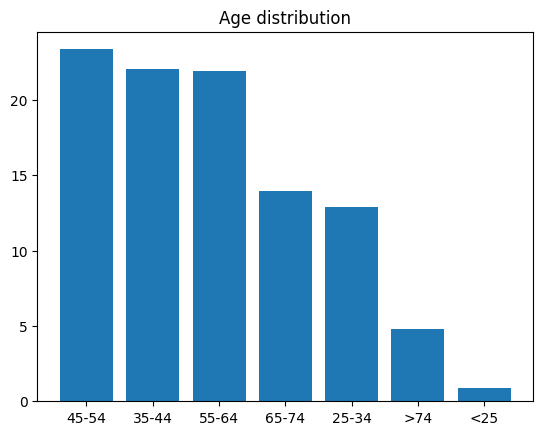

In [135]:
fig, ax = plt.subplots()
plt.bar(pd.DataFrame(df.groupby('age').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False).index,
        pd.DataFrame(df.groupby('age').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False)['ID'])

ax.set_title('Age distribution')

## Income

<Axes: xlabel='income', ylabel='Count'>

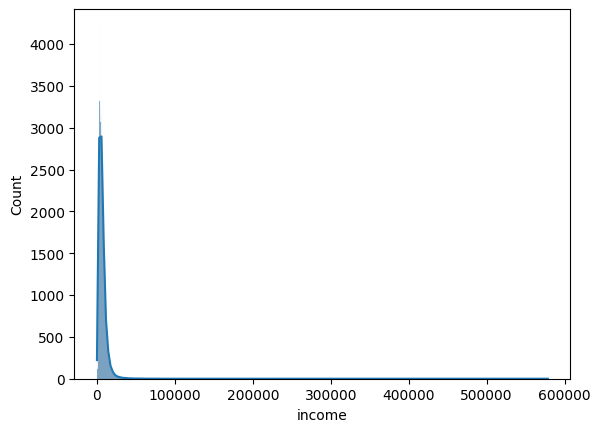

In [138]:
sns.histplot(data = df, x = 'income', kde=True)

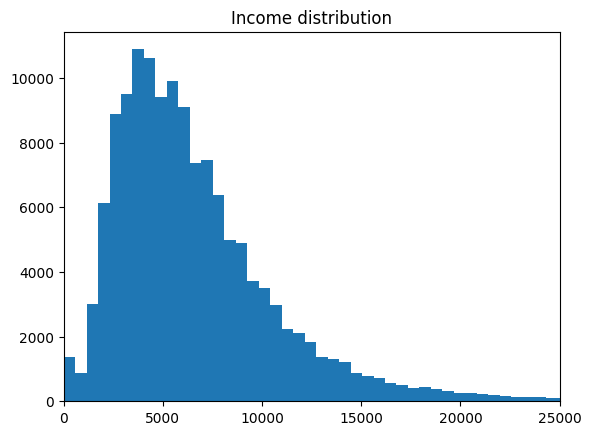

In [117]:
# Plot the results
fig, ax = plt.subplots()

ax.hist(df['income'], bins=1000)
ax.set_title('Income distribution')
ax.set_xlim(0, 25000)
plt.show()

## Loan limit

In [129]:
loan_limit_dist = pd.DataFrame(df.groupby('loan_limit').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False)
loan_limit_dist

,ID
loan_limit,
cf,91.039214
ncf,6.711509


Text(0.5, 1.0, 'Loan limit distribution')

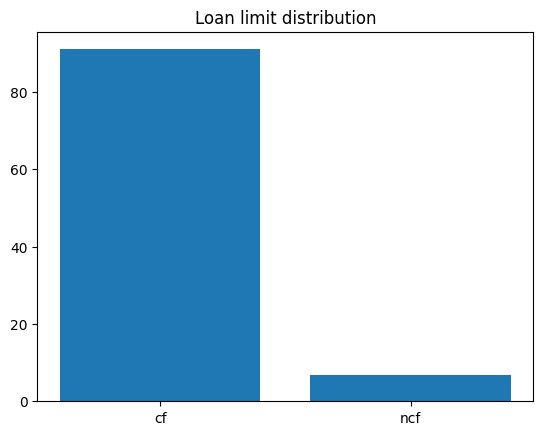

In [136]:
fig, ax = plt.subplots()
plt.bar(pd.DataFrame(df.groupby('loan_limit').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False).index,
        pd.DataFrame(df.groupby('loan_limit').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False)['ID'])

ax.set_title('Loan limit distribution')

# Balancing

In [ ]:
df.hist(column='income', bins=[0, 3720, 5760, 8520, max(df['income'])])

In [ ]:
# fig, ax = plt.subplots()
df.hist(column='income', bins=[0, 2000, 3720, 4500, 5760, 7000, 8520, 15000, max(df['income'])])


In [83]:
df['ID'].nunique() == len(df)

True

In [85]:
a = pd.DataFrame(df.groupby('Gender').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False)
a

,ID
Gender,
Male,28.483218
Joint,27.846237
Sex Not Available,25.330598
Female,18.339948


In [ ]:
plt.bar(pd.DataFrame(df.groupby('Gender').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False).index,
        pd.DataFrame(df.groupby('Gender').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False)['ID'])

array([[<Axes: title={'center': 'income'}>]], dtype=object)

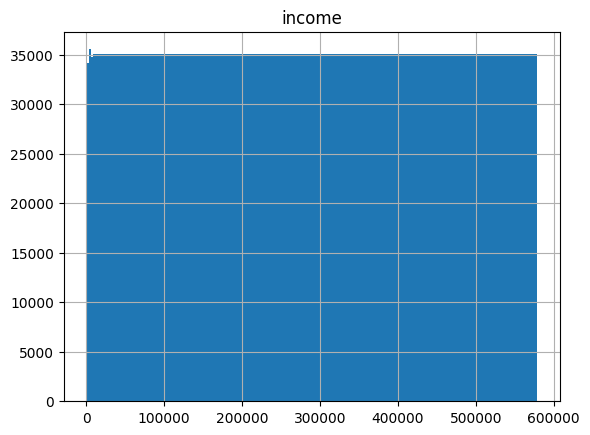

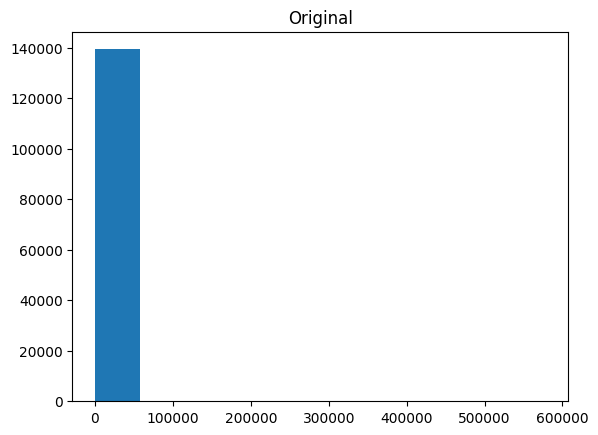

In [95]:
max(df['income'])

578580.0

In [79]:
a.index

Index(['Male', 'Joint', 'Sex Not Available', 'Female'], dtype='object', name='Gender')

In [76]:
df.groupby('Gender').nunique().index
pd.DataFrame(df.groupby('Gender').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False).index

Index(['Male', 'Joint', 'Sex Not Available', 'Female'], dtype='object', name='Gender')

In [77]:
sns.barplot(x=pd.DataFrame(df.groupby('Gender').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False).index,
            y=df.groupby('Gender').nunique()['ID']/len(df)*100,
            data=df)

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 148670 and the vector passed to `x` has length 4.

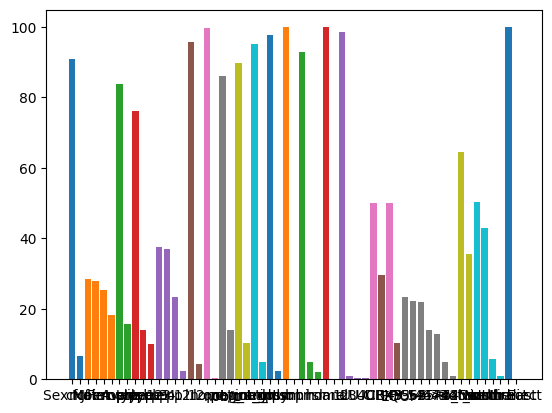

In [82]:
fig, ax = plt.subplots(round(columns_categorical//3, ), 3)
for name_column in columns_categorical:
    ax.plt.bar(pd.DataFrame(df.groupby(name_column).nunique()['ID']/len(df)*100).sort_values('ID', ascending=False).index,
        pd.DataFrame(df.groupby(name_column).nunique()['ID']/len(df)*100).sort_values('ID', ascending=False)['ID'])

<BarContainer object of 4 artists>

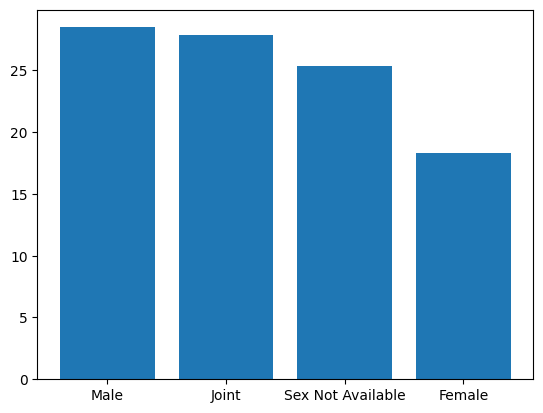

In [81]:
plt.bar(pd.DataFrame(df.groupby('Gender').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False).index,
        pd.DataFrame(df.groupby('Gender').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False)['ID'])

In [127]:
a = pd.DataFrame(df.groupby('Gender').nunique()['ID']/len(df)*100).sort_values('ID', ascending=False)
a

,ID
Gender,
Male,28.483218
Joint,27.846237
Sex Not Available,25.330598
Female,18.339948


In [59]:
df['ID'].nunique() == len(df)

True

In [ ]:
df.sort_values('ID’, ascending=False)